#Analise da acurácia dos modelos de machine learning aplicado em dados de compra de carros, aplicando o modelo de Suport Vector Machine de formas lineares e não lineares e em arvóres de decisão

##Processo de extração e transformação dos dados

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()
# Crie um dicionário mapeando os valores
substituicoes = {"yes": 1, "no": 0}

# Substitua os valores no dataframe
dados.replace(substituicoes, inplace=True)



In [ ]:
dados

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0
9996,9996,13246,2002,107424.63,1
9997,9997,13018,2014,93856.99,0
9998,9998,10464,2011,51250.57,1


In [ ]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
from datetime import date
dados['idade_do_modelo'] =   date.today().year - dados.ano_do_modelo

dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [ ]:
dados.milhas_por_ano = dados.milhas_por_ano * 1.60934

dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,35085.22134,2000,30941.02,1,24
1,1,12622.05362,1998,40557.96,1,26
2,2,11440.79806,2006,89627.50,0,18
3,3,43167.32682,2015,95276.14,0,9
4,4,12770.11290,2014,117384.68,1,10


In [ ]:
dados = dados.rename(columns={'milhas_por_ano': 'km_por_ano'})

dados.head()

,Unnamed: 0,km_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,35085.22134,2000,30941.02,1,24
1,1,12622.05362,1998,40557.96,1,26
2,2,11440.79806,2006,89627.50,0,18
3,3,43167.32682,2015,95276.14,0,9
4,4,12770.11290,2014,117384.68,1,10


##Desenvolvimento do modelo

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#Divisão entre features e eixo y
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

#Divisão entre treino e teste
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#Deslocar pela média e dividir pelo desvio padrão
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

#Instancia do modelo
modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

#Acuracia do modelo
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [ ]:
#Classificador Dummy

from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
dummy_stratified.score(teste_x, teste_y)


0.58

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



#Divisão entre features e eixo y
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

#Divisão entre treino e teste
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))


#Instancia do modelo com o DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

#Acuracia do modelo
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


##Árvore de Decisão

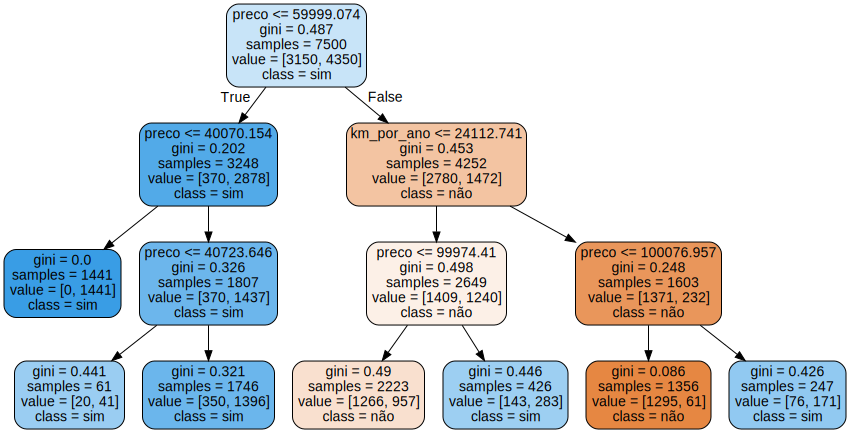

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, out_file=None,  feature_names=x.columns, filled=True, rounded=True, class_names =
                           ['não', 'sim'])
grafico = graphviz.Source(dot_data)

grafico